In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Introduction

* hook : a h
* research problem :
* research question :
* thesis :
* overview : 

The broad question that I will address is "Question 1: What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?". To make it more specific, I made the question "Can the player’s age and total hours played predict their likelihood of subscribing to the game-related newsletter?". 

The subscribe column will still be the target variable (whether a player subscribed to the newsletter), but we are focusing on the predictors of experience and age as explanatory variables. The age variable will be treated as a continuous feature, and experience will be analyzed categorically. Since the goal is to predict subscription likelihood based on these two factors, I would use K-Nearest Neighbors for this task. I'd use the KNN method since it can handle non-linear patterns as well as the experience categories (non-numeric), showing how age and experience influence the likelihood of subscription.

# Data Description

First, upon seeing the 2 available datasets, there is a `players.csv` file that includes data about individual players, such as name, experience, playtime, subscription status, gender, age, and hashed email. The total amount of observations is 197, and number of variables is 7. The `age` variable is numerical, and we can calculate the mean and standard deviation to better understand player demographics. The `subscription_status` variable is a boolean (true or false), which could be important to our analysis of predicting newsletter subscriptions. The player experience variable is categorical, representing player classifications which we need. Some potential issues with this data include missing values in certain columns, such as the age category in `players.csv`. There are 2 observations with `N/A` in that column.

The `sessions.csv` file records individual play sessions, with start and end times variables. There is a hashed email variable, start time and end time, as well as the original start and end time. There are five variables total. The dataset mainly contains observations on the time players put into the game. The start and end times are in a date format, which is not numerical, while the original start and end times are numerical which measures how long a player was engaged in a session  which reflects the demand on the server during gameplay. However, these values are extremely big and very hard to read, so we would need to standardize the data.



# Exploratory Analysis and Visualization 

**Reading Data**

To read in the data, we first loaded in the `tidyverse` library. `tidyverse` is a package in the R coding language used in data science for reading, wrangling, analysis, and visualization. 

Data was collected from two files : `players.csv`, which informs us of participant characteristics, and `sessions.csv`, which details every individual play session. In order to maintain reproducability, we published these files into our Github repository and read them in using a URL. The resulting datasets were named `players` and `sessions`, respectively.

The data was then made accessible for `tidyverse` functions ('tidied') before it was displayed. In our case, this meant reformatting the `hashedEmail` column to have underscores (`_`) between its words and using `as.POSIXct()` to reformat the start and end times in `sessions` to be `dttm` variables, which represent dates.

Finally, `players` and `sessions` were displayed using the `head()` function, which shows the first six rows of a dataset.

In [3]:
library(tidyverse)

players_url <- "https://raw.githubusercontent.com/20under20/dcsi100-project-group-002-13/refs/heads/main/players.csv"


players <- read_csv(players_url, show_col_types = FALSE) |>        # reading the 'players' dataset
           rename(hashed_email = hashedEmail,                      # tidying the 'players' dataset
                  age = Age) 
head(players)                                                      # displaying the 'players' dataset

sessions_url <- "https://raw.githubusercontent.com/20under20/dcsi100-project-group-002-13/refs/heads/main/sessions.csv"

sessions <- read_csv(sessions_url, show_col_types = FALSE) |>       # reading the 'sessions' dataset
            rename(hashed_email = hashedEmail) |>                   # tidying the 'sessions' dataset 
            mutate(start_time = as.POSIXct(start_time),
                   end_time = as.POSIXct(end_time)) 
head(sessions)                                                      # displaying the 'sessions' dataset

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30-06-20,30-06-20,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17-06-20,17-06-20,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25-07-20,25-07-20,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25-07-20,25-07-20,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25-05-20,25-05-20,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23-06-20,23-06-20,1.71916e+12,1.71916e+12


**Wrangling data**

Since our research is focused on player characteristics, we can use the `players` dataset.

Our goal is to determine if demographic data, `age` and `gender`, can predict if a player will subscribe to a game-related news-letter, or the value of `subscribe`.

Therefore, we will select the `age` `gender` and `subscribe` variables from the `players` dataset.

We also need to polarize the `gender` variable in order to do KNN-classification in the future.

In [4]:
data <- players |>
        select(age, gender, subscribe) 
data

age,gender,subscribe
<dbl>,<chr>,<lgl>
9,Male,TRUE
17,Male,TRUE
17,Male,FALSE
⋮,⋮,⋮
17,Prefer not to say,FALSE
17,Male,FALSE
NA,Other,TRUE


In [5]:
#data_mean <- data |>
 # select(played_hours, Age) |>
  #summarize(played_hours = mean(played_hours, na.rm = TRUE),
    #Age = mean(Age, na.rm = TRUE))
#data_mean

summary_statistics <- summary(data)
summary_statistics

#data_bar <- ggplot(data, aes(x = Age, y = played_hours)) + 
#geom_bar(stat = "identity") +
#xlab("Age (Years)") +
#ylab("Played Hours (Hours)") + 
#ggtitle("Age vs. Played Hours")
#data_bar

      age           gender          subscribe      
 Min.   : 8.00   Length:196         Mode :logical  
 1st Qu.:17.00   Class :character   FALSE:52       
 Median :19.00   Mode  :character   TRUE :144      
 Mean   :20.52                                     
 3rd Qu.:22.00                                     
 Max.   :50.00                                     
 NA's   :2                                         

From these plots we can see that the gamers who are 17 played the most hours, hinting that the chance of subscribing to the newsletter could be related to this age and the hours played. However, we would need to factor in whether they are subscribed or not, and separate the sections into telling whether they are or not. This visualization just demonstrates the age and the hours played.

# Methods and Results

I would suggest using the K-Nearest Neighbors (KNN) algorithm. 
- KNN is suitable here because it doesn't need a linear representation for the relationship between predictors (played hours and age) and outcome (subscription), thus apt to identify potential non-linear relationships.
- KNN selects the 'k' closest data points within the feature space and classifies based upon the majority class of the neighbors. The reason for this flexibility is that the interaction between age, played hours, and subscription may not be linear.
- The method uses the premise that the distance between points can be used to make predictions and that features must be scaled to have a meaningful distance metric.
One drawback of KNN is its computational cost, especially for large datasets because it must calculate distances from test data to all training points.

To compare and select the best model, I will compare its performance using cross-validation. For pre-processing the data, do na.rm = TRUE for the missing values, standardize the data for age and playing hours, and then see if there is any variance in people's experiences if they are subscribed. The information will be split into a training set (70%) and a testing set (30%), and I'll also use k-fold cross-validation to achieve a better estimate. This should allow us to identify predictors that make the most contributions to subscription probability!

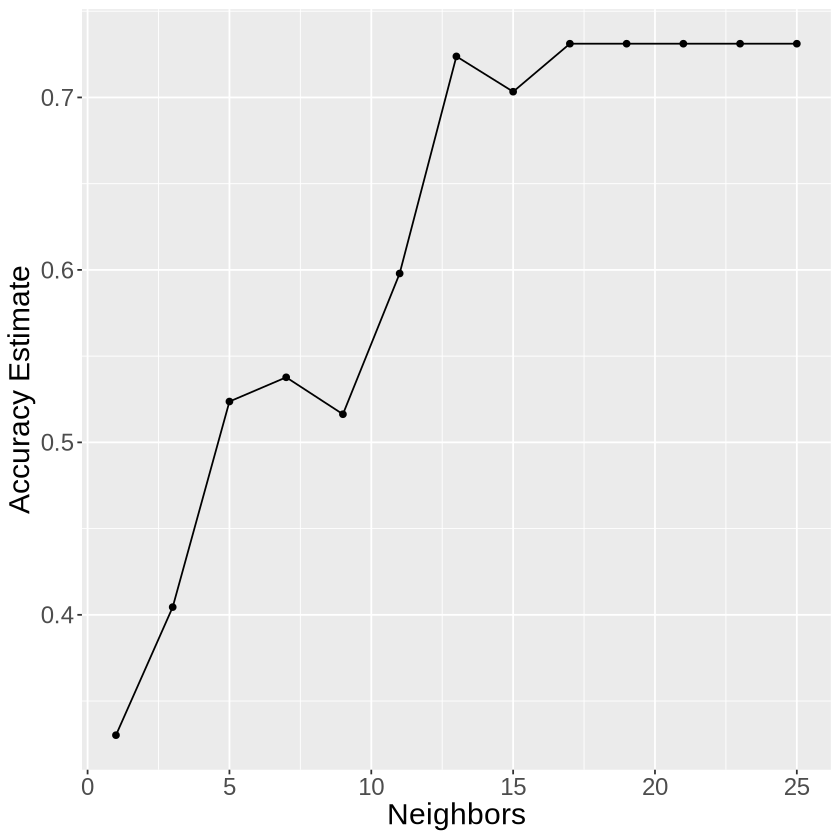

In [20]:
# KNN Classification step 1 : find 'k'

# Set the random seed
set.seed(1234)

#recode gender and age as factors
data <- drop_na(data) |>
        mutate(gender = as_factor(gender)) |>
        mutate(subscribe = as_factor(subscribe)) |>
        mutate(age = as_factor(age)) 

# split data
data_split <- initial_split(data, prop = 0.75, strata = subscribe)
data_train <- training(data_split)
data_test <- testing(data_split)

# recipe : making gender into a numerical value for knn, centering and stepping age
normalize_recipe <- recipe(subscribe ~ gender + age, data = data_train) |>
                    step_dummy(all_nominal_predictors()) |> 
                    step_zv(all_predictors()) |>
                    step_center(all_numeric_predictors()) |>
                    step_scale(all_numeric_predictors())

# tuning for k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# workflow and accuracies
k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 2))

data_5fold <- vfold_cv(data_train, v = 5, strata = subscribe)

accuracy <- workflow() |>
  add_recipe(normalize_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_5fold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  select(neighbors, mean)

# accuracy vs k plot
accuracy_vs_k <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 18))

accuracy_vs_k

In [18]:
best_k <- accuracy |>
          arrange(desc(mean)) |>
          head(1) |>
          pull(neighbors)
best_k

[1] 17